In [1]:
# Importing libraries
import import_ipynb
import weather_predict
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

importing Jupyter notebook from weather_predict.ipynb


In [2]:
df = pd.read_csv('data sets/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,91,94,46,29.367924,76.249001,6.149934,92.828409,arecanut
1,105,95,50,27.333690,83.676752,5.849076,101.049479,arecanut
2,108,92,53,27.400536,82.962213,6.276800,104.937800,arecanut
3,86,76,54,29.315908,80.115857,5.926825,90.109781,arecanut
4,80,77,49,26.054330,79.396545,5.519088,113.229737,arecanut


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,118.516338,wheat
2196,99,15,27,27.417112,56.636362,6.086922,85.283073,wheat
2197,118,33,30,24.131797,67.225123,6.362608,115.548559,wheat
2198,117,32,34,26.272418,52.127394,6.758793,84.783529,wheat
2199,104,18,30,23.603016,60.396475,6.779833,93.958028,wheat


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['arecanut', 'arhar/tur dal', 'coconut', 'cotton', 'cowpea', 'gram',
       'groundnut', 'horsegram', 'jowar', 'maize', 'moong dal', 'onion',
       'potato', 'ragi', 'rice', 'soyabean', 'sugarcane', 'sunflower',
       'sweet potato', 'turmeric', 'urad', 'wheat'], dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

arecanut         100
arhar/tur dal    100
urad             100
turmeric         100
sweet potato     100
sunflower        100
sugarcane        100
soyabean         100
rice             100
ragi             100
potato           100
onion            100
moong dal        100
maize            100
jowar            100
horsegram        100
groundnut        100
gram             100
cowpea           100
cotton           100
coconut          100
wheat            100
Name: label, dtype: int64

<AxesSubplot:>

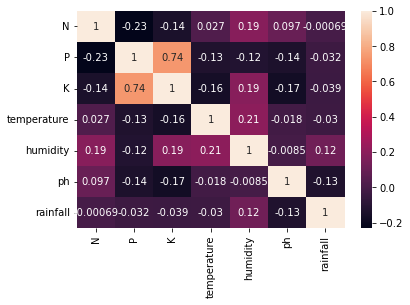

In [11]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [12]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']
# print(type(df))

In [13]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)
print(Ytrain)

1936     turmeric
610     groundnut
372        cotton
1559     soyabean
1500     soyabean
          ...    
1071    moong dal
433        cowpea
674     groundnut
1099    moong dal
1608    sugarcane
Name: label, Length: 1760, dtype: object


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  93.63636363636364
               precision    recall  f1-score   support

     arecanut       0.94      1.00      0.97        16
arhar/tur dal       0.83      0.95      0.89        21
      coconut       1.00      1.00      1.00        21
       cotton       1.00      1.00      1.00        14
       cowpea       1.00      1.00      1.00        18
         gram       0.86      0.95      0.90        19
    groundnut       1.00      0.96      0.98        24
    horsegram       0.90      0.56      0.69        16
        jowar       1.00      1.00      1.00        23
        maize       0.74      1.00      0.85        17
    moong dal       1.00      1.00      1.00        17
        onion       1.00      1.00      1.00        26
       potato       1.00      0.33      0.50        18
         ragi       1.00      1.00      1.00        15
         rice       0.66      1.00      0.79        23
     soyabean       1.00      0.77      0.87        13
    sugarcane   

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [18]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [19]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
               precision    recall  f1-score   support

     arecanut       1.00      1.00      1.00        16
arhar/tur dal       1.00      1.00      1.00        21
      coconut       1.00      1.00      1.00        21
       cotton       1.00      1.00      1.00        14
       cowpea       1.00      1.00      1.00        18
         gram       1.00      1.00      1.00        19
    groundnut       1.00      1.00      1.00        24
    horsegram       1.00      1.00      1.00        16
        jowar       1.00      1.00      1.00        23
        maize       1.00      1.00      1.00        17
    moong dal       1.00      1.00      1.00        17
        onion       1.00      1.00      1.00        26
       potato       0.90      1.00      0.95        18
         ragi       1.00      1.00      1.00        15
         rice       1.00      0.91      0.95        23
     soyabean       1.00      1.00      1.00        13
    sugarcane    

In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [22]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9818181818181818
               precision    recall  f1-score   support

     arecanut       1.00      1.00      1.00        16
arhar/tur dal       0.95      1.00      0.98        21
      coconut       1.00      1.00      1.00        21
       cotton       0.93      1.00      0.97        14
       cowpea       1.00      1.00      1.00        18
         gram       1.00      0.95      0.97        19
    groundnut       1.00      1.00      1.00        24
    horsegram       1.00      1.00      1.00        16
        jowar       1.00      1.00      1.00        23
        maize       1.00      0.94      0.97        17
    moong dal       1.00      1.00      1.00        17
        onion       1.00      1.00      1.00        26
       potato       0.82      1.00      0.90        18
         ragi       1.00      1.00      1.00        15
         rice       1.00      0.83      0.90        23
     soyabean       0.87      1.00      0.93        13
    sugarcane       1.00 

In [24]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98409091, 0.97954545, 0.98863636, 0.98636364, 0.98181818])

In [25]:
#Saving trained SVM model

In [26]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9704545454545455
               precision    recall  f1-score   support

     arecanut       1.00      1.00      1.00        16
arhar/tur dal       1.00      0.86      0.92        21
      coconut       0.95      1.00      0.98        21
       cotton       0.93      1.00      0.97        14
       cowpea       1.00      1.00      1.00        18
         gram       0.90      1.00      0.95        19
    groundnut       1.00      1.00      1.00        24
    horsegram       0.88      0.88      0.88        16
        jowar       1.00      1.00      1.00        23
        maize       1.00      0.94      0.97        17
    moong dal       0.94      1.00      0.97        17
        onion       1.00      1.00      1.00        26
       potato       0.83      0.83      0.83        18
         ragi       1.00      1.00      1.00        15
         rice       0.95      0.87      0.91        23
     soyabean       1.00      1.00      1.00        13
    sugar

In [28]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95454545, 0.95909091, 0.96363636, 0.97045455, 0.94318182])

### Saving trained Logistic Regression model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9954545454545455
               precision    recall  f1-score   support

     arecanut       1.00      1.00      1.00        16
arhar/tur dal       1.00      1.00      1.00        21
      coconut       1.00      1.00      1.00        21
       cotton       1.00      1.00      1.00        14
       cowpea       1.00      1.00      1.00        18
         gram       1.00      1.00      1.00        19
    groundnut       1.00      1.00      1.00        24
    horsegram       1.00      1.00      1.00        16
        jowar       1.00      1.00      1.00        23
        maize       1.00      1.00      1.00        17
    moong dal       1.00      1.00      1.00        17
        onion       1.00      1.00      1.00        26
       potato       0.90      1.00      0.95        18
         ragi       1.00      1.00      1.00        15
         rice       1.00      0.91      0.95        23
     soyabean       1.00      1.00      1.00        13
    sugarcane       1.00  

In [31]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99772727, 0.99545455, 0.99545455, 0.98863636])

### Saving trained Random Forest model

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [33]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain.values,Ytrain.values)
predicted_values = XB.predict(Xtest.values)
x = metrics.accuracy_score(Ytest.values, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9954545454545455
               precision    recall  f1-score   support

     arecanut       1.00      1.00      1.00        16
arhar/tur dal       1.00      1.00      1.00        21
      coconut       1.00      1.00      1.00        21
       cotton       1.00      1.00      1.00        14
       cowpea       1.00      1.00      1.00        18
         gram       1.00      1.00      1.00        19
    groundnut       1.00      1.00      1.00        24
    horsegram       1.00      1.00      1.00        16
        jowar       1.00      1.00      1.00        23
        maize       1.00      1.00      1.00        17
    moong dal       1.00      1.00      1.00        17
        onion       1.00      1.00      1.00        26
       potato       0.95      1.00      0.97        18
         ragi       1.00      1.00      1.00        15
         rice       0.96      0.96      0.96        23
     soyabean       1.00      1.00      1.00        13
    sugarcane       1

In [34]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98636364, 0.99090909, 0.99772727, 0.99090909, 0.98409091])

### Saving trained XGBoost model

In [35]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

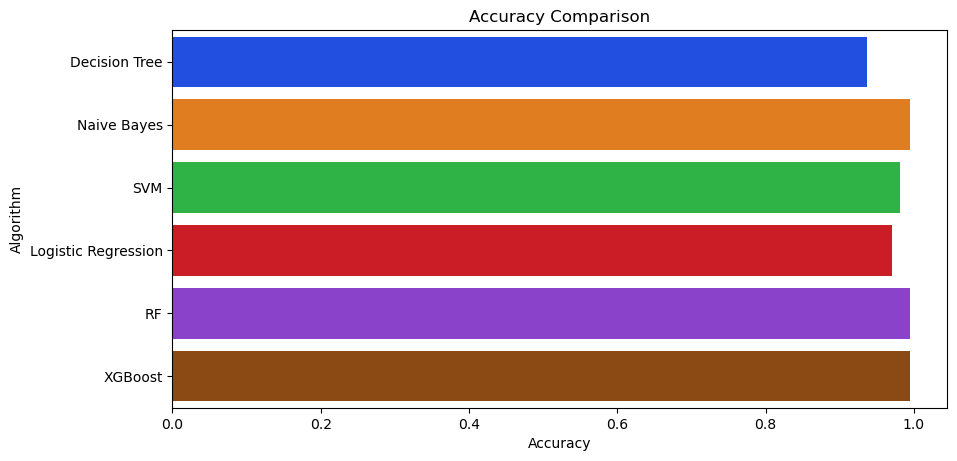

In [36]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='bright')

In [37]:
accuracy_models = dict(zip(model, acc))
accuracy_dict={}
for k, v in accuracy_models.items():
    print (k, '-->', v)
    accuracy_dict[k]=v
# print(accuracy_dict)

Decision Tree --> 0.9363636363636364
Naive Bayes --> 0.9954545454545455
SVM --> 0.9818181818181818
Logistic Regression --> 0.9704545454545455
RF --> 0.9954545454545455
XGBoost --> 0.9954545454545455


## Making a prediction

In [38]:
data = np.array([[1,20,36,23.6,70.3,5.6, weather_predict.weather_predic_dist("mandya")[0]]])
# data = np.array([[1,20,36,23.6,70.3,5.6, weather_predict.weather_predic_dist("mandya")[0]]])
# 1	27	36	23.98598756	93.34236582	5.684995235	104.991282
prediction = RF.predict(data)
print(prediction)
prediction = LogReg.predict(data)
print(prediction)
prediction = SVM.predict(data)
print(prediction)
prediction = NaiveBayes.predict(data)
print(prediction)
prediction = DecisionTree.predict(data)
print(prediction)
prediction = XB.predict(data)
print(prediction)

['horsegram']
['sugarcane']
['turmeric']
['horsegram']
['groundnut']
['sugarcane']


## Crop Fraction Function
<h3>gives the fraction of area and production of that particular crop in that particular district</h3>

In [39]:
def crop_fraction(dist,crop,sum_prod,sum_area):
#     print(dist,crop)
    dist_data=pd.read_csv("data sets/karnataka production.csv")
    x = [list(row) for row in dist_data.values]
    t_production=0
    t_area=0
    for i in x:
        if i[1].lower() == dist.lower() and i[2].lower()==crop.lower():
            t_production=i[4]
            t_area=i[3]
    return(t_production/sum_prod,t_area/sum_area)

## Crop Clustering Function
<h4>uses clustering coefficient to give make decision when algorithms are unable to come to a single conclusion based on the crop production and area fractions</h4>

In [52]:
def crop_clustering(dist,data):
    dist_data=pd.read_csv("data sets/karnataka production.csv")
    x = [list(row) for row in dist_data.values]
    sum_production=0
    sum_area=0
    for i in x:
        if i[1].lower() == dist.lower():
            sum_production=sum_production+i[4]
            sum_area=sum_area+i[3]
    if(sum_production == 0): 
        print("District not found")
        return
    model_list=[[DecisionTree,"Decision Tree"],[NaiveBayes,"Naive Bayes"],[SVM,"SVM"],[LogReg,"Logistic Regression"],[RF,"RF"],[XB,"XGBoost"]]
#     print(model_list)
    dict_pred_crop={}
    for x in model_list:
        prediction = x[0].predict(data)
        prod_frac,area_frac=crop_fraction(dist,prediction[0],sum_production,sum_area)
        score=(area_frac+prod_frac)*accuracy_dict[x[1]]/2+accuracy_dict[x[1]]/2
        if(prediction[0] not in dict_pred_crop.keys()):
            dict_pred_crop[prediction[0]]=score
        else:
            dict_pred_crop[prediction[0]]+=score
    print(dict_pred_crop)
    key_crop=max(dict_pred_crop,key=dict_pred_crop.get)
    return (key_crop,dict_pred_crop[key_crop])

## Make a Final Prediction

In [60]:
dist="davangere"
#                 N , P , K , TEMP , HUMIDITY , pH , RAINFALL
data = np.array([[1 , 20, 36, 23.6 , 70.3     , 5.6, weather_predict.weather_predic_dist(dist)[0]]])
crop_clustering(dist,data)

{'groundnut': 0.4884949163609841, 'horsegram': 0.9979730545764097, 'turmeric': 0.4909090909090909, 'sugarcane': 1.4732924282729236}


('sugarcane', 1.4732924282729236)